In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import sys
sys.path.append("..")

In [6]:
from utils import parse_outputs, check_k_price_range

# Function definition

In [11]:
def read_price(filename):
    p1 = []
    p2 = []
    is_first = True
    with open(filename) as fd:
        lines = fd.readlines()
        for l in lines:
            if "PRICE:" in l:
                price = float(l.split(" ")[1])
                if is_first:
                    p1.append(price)
                else:
                    p2.append(price)
                is_first = not is_first
    i = 0
    while i < len(p1):
        in_range = 10 < p1[i] < 20 and 10 < p2[i] < 20
        if not in_range:
            p1.pop(i)
            p2.pop(i)
        else:
            i += 1
    return p1, p2

In [67]:
def draw(p1, p2, figsize=(4.5,2)):
    print("Total:", len(p1))
    print("Round 1 mean:", np.mean(p1))
    print("Round 2 mean:", np.mean(p2))
    # Example list of data
    data_1 = np.array(p1)
    data_2 = np.array(p2)

    # Divide data into 9 bins
    bins_1 = np.linspace(10, 20, 10)
    bins_2 = np.linspace(10, 20, 10)

    # Compute histogram of the data
    hist_1, bins_1 = np.histogram(data_1, bins=bins_1)
    hist_2, bins_2 = np.histogram(data_2, bins=bins_2)

    # Create a bar plot using Matplotlib
    plt.figure(figsize=figsize, dpi=250)
    plt.bar(bins_1[:-1]+0, hist_1, width=0.3 * (bins_1[1]-bins_1[0]), align='edge', label='Before AI Critic')
    plt.bar(bins_2[:-1]+0.3, hist_2, width=0.3 * (bins_2[1]-bins_2[0]), align='edge', label='After AI Critic')
    
    # Add numbers at the center of each bar
    for i in range(len(hist_1)):
        x1 = bins_1[i] + 0.15 * (bins_1[1]-bins_1[0])
        y1 = hist_1[i]
        plt.text(x1, y1+1, str(y1), ha='center', fontsize=7)

    for i in range(len(hist_2)):
        x2 = bins_2[i] + 0.45 * (bins_2[1]-bins_2[0])
        y2 = hist_2[i]
        plt.text(x2, y2+1, str(y2), ha='center', fontsize=7)

    # Set the title and axis labels
    plt.title('Distribution of deal price')
    xticks = np.arange(10, 21, 2)
    plt.xticks(xticks, [str(x) for x in xticks], fontsize=8)
    plt.xlabel('Deal price')
    plt.ylabel('Frequency')
    plt.legend(fontsize=7)

    # Display the plot
    plt.show()
    return 

In [ ]:
def draw_multiple(ps, labels=None, figsize=(4,2), xlim=(10, 20)):
    # Example list of data
    data = []
    for pi, p in enumerate(ps):
        if(pi == 0): 
            for p_ in p: data.append([p_])
        else: 
            for pj, p_ in enumerate(p): data[pj].append(p_)

    # Divide data into 10 bins
    bins = np.linspace(10, 20, 11)

    # Compute histogram of the data
    hist = []
    for d in data:
        h, b = np.histogram(d, bins=bins)
        hist.append(h)

    # Create a bar plot using Matplotlib
    plt.figure(figsize=figsize, dpi=250)
    
    if(labels is None):
        labels = []
        for i in range(len(hist)):
            if(i == 0): labels.append('Run %d, Before AI Critic' % (i + 1))
            else: labels.append('Run %d, After AI Critic' % (i + 1))
            
    bar_width = 0.8 / len(hist)
    x_shift = 0.1
    for i in range(len(hist)):
        plt.bar(x_shift + bins[:-1] + bar_width * i, hist[i], width=bar_width, align='edge', label=labels[i])
        
        # Add numbers at the center of each bar
        for j in range(len(hist[i])):
            x = bins[j] + bar_width / 2 + bar_width * i + x_shift
            y = hist[i][j]
            if(x > xlim[0]):
                plt.text(x, y+1, str(y), ha='center', fontsize=7)

    # Set the title and axis labels
    plt.title('Distribution of deal price', fontsize=8)
    
    xticks = np.arange(10, 21, 1)
    plt.xticks(xticks, [str(x) for x in xticks], fontsize=8)
    plt.xlabel('Deal price', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.legend(fontsize=8)
    
    plt.xlim(xlim)

    # Display the plot
    plt.show()
    return bins, hist


In [41]:
def draw_multiple_with_bottom(ps, labels=None, figsize=(4,2), xlim=(10, 20)):
    # Example list of data
    data = []
    for pi, p in enumerate(ps):
        if(pi == 0): 
            for p_ in p: data.append([p_])
        else: 
            for pj, p_ in enumerate(p): data[pj].append(p_)

    # Divide data into 10 bins
    bins = np.linspace(10, 20, 11)

    # Compute histogram of the data
    hist = []
    for d in data:
        h, b = np.histogram(d, bins=bins)
        hist.append(h)

    # Create a bar plot using Matplotlib
    plt.figure(figsize=figsize, dpi=250)
    
    if(labels is None):
        labels = []
        for i in range(len(hist)):
            if(i == 0): labels.append('Run %d, Before AI Critic' % (i + 1))
            else: labels.append('Run %d, After AI Critic' % (i + 1))
            
    bar_width = 0.8 / len(hist)
    
    bottom = 0
    for i in range(len(hist)):
        plt.bar(bins[:-1], hist[i], width=bar_width, align='edge', label=labels[i], bottom=bottom)
        bottom += hist[i].max() + 10
        
        # # Add numbers at the center of each bar
        # for j in range(len(hist[i])):
        #     x = bins[j] + bar_width / 2 + bar_width * i + x_shift
        #     y = hist[i][j]
        #     if(x > xlim[0]):
        #         plt.text(x, y+1, str(y), ha='center', fontsize=7)

    # Set the title and axis labels
    plt.title('Distribution of deal price', fontsize=8)
    
    xticks = np.arange(10, 21, 1)
    plt.xticks(xticks, [str(x) for x in xticks], fontsize=8)
    plt.xlabel('Deal price', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.legend(fontsize=8)
    
    plt.xlim(xlim)

    # Display the plot
    plt.show()
    return bins, hist


# Before v.s. After AI Critic

## 1.7.1 Claude-v1.3 Criticize Seller

Total: 390
Round 1 mean: 15.422435897435898
Round 2 mean: 16.92628205128205


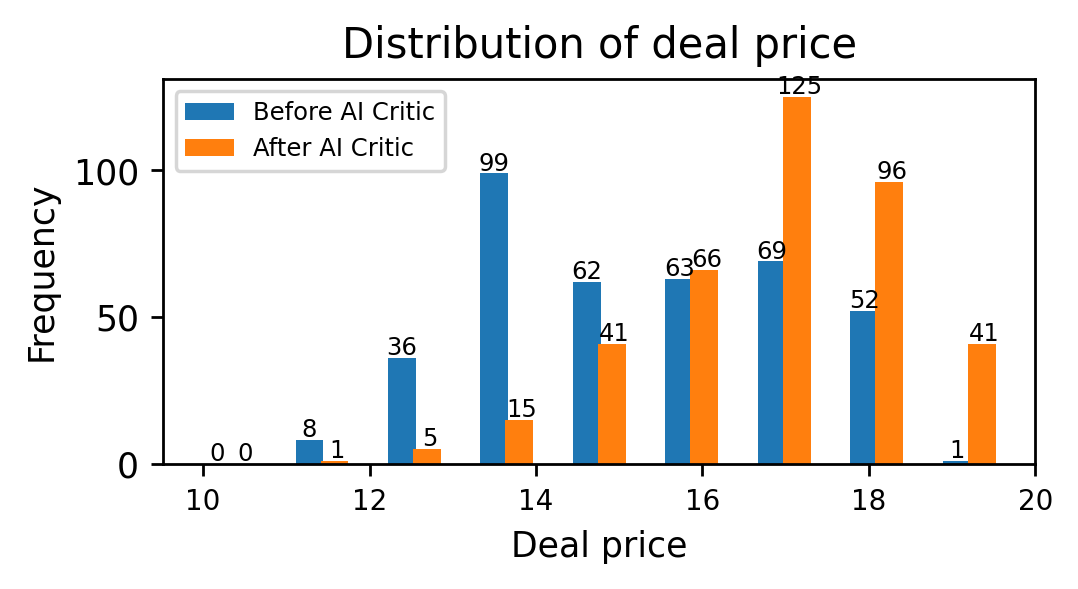

In [68]:
draw(*read_price('../outputs/criticize_seller_500_runs_rollout_2_ver_1.7.1.txt')) # claude feedback on seller

Total: 278
Round 1 mean: 15.64658273381295
Round 2 mean: 16.475719424460433


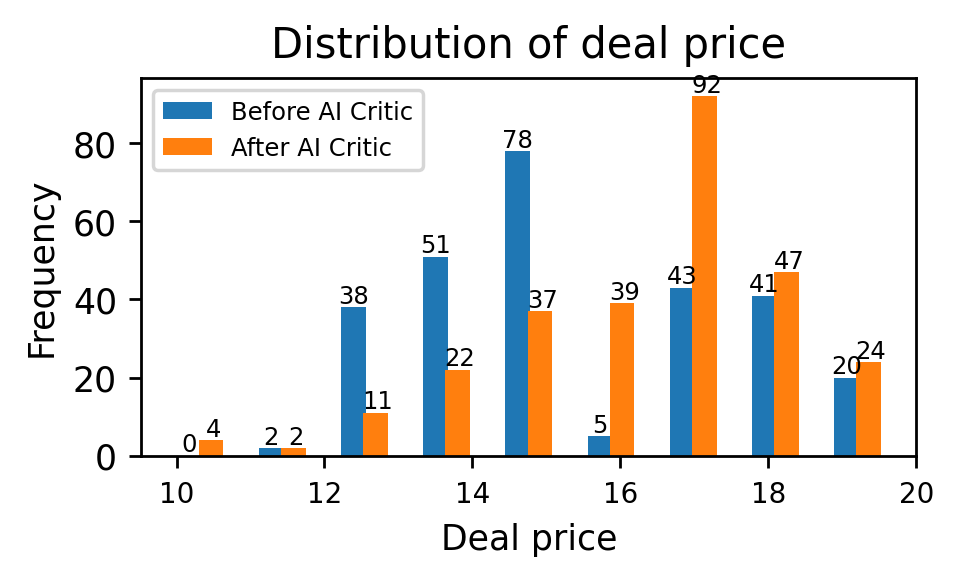

In [61]:
draw(*read_price('outputs/seller_critic_claude_500_runs_rollout_2_ver_1.7.0.txt')) # ignore this one because buggy

## 1.8.1 Claude-v1.3 Criticize Buyer

Total: 439
Round 1 mean: 14.929384965831435
Round 2 mean: 13.71127562642369


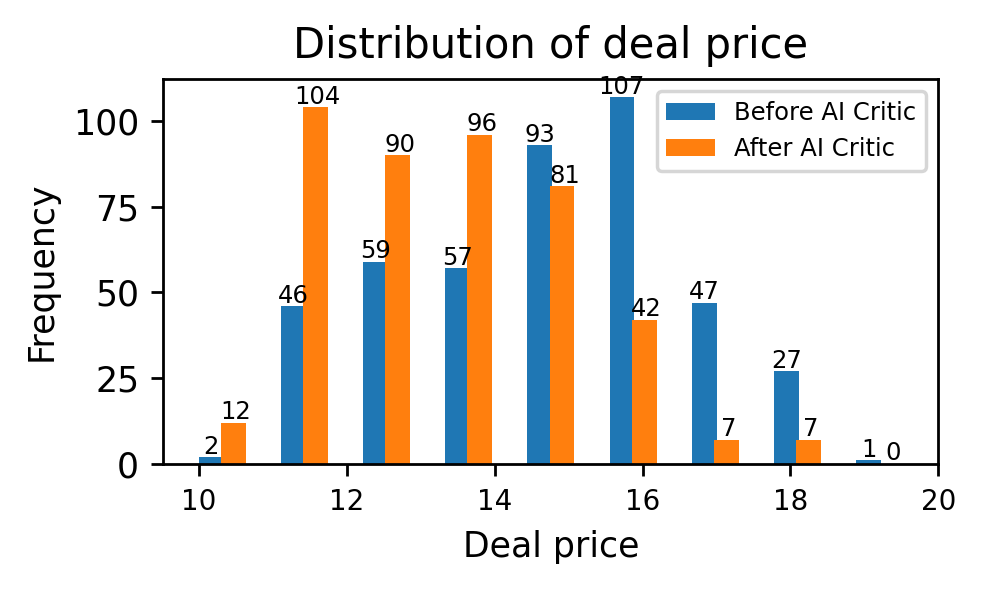

In [29]:
draw(*read_price('../outputs/criticize_buyer_500_runs_rollout_2_ver_1.8.1.txt')) # claude feedback on seller

## 0.2.1.0 Claude-instant-v1.0 criticize seller

Total: 348
Round 1 mean: 15.25287356321839
Round 2 mean: 16.284137931034483


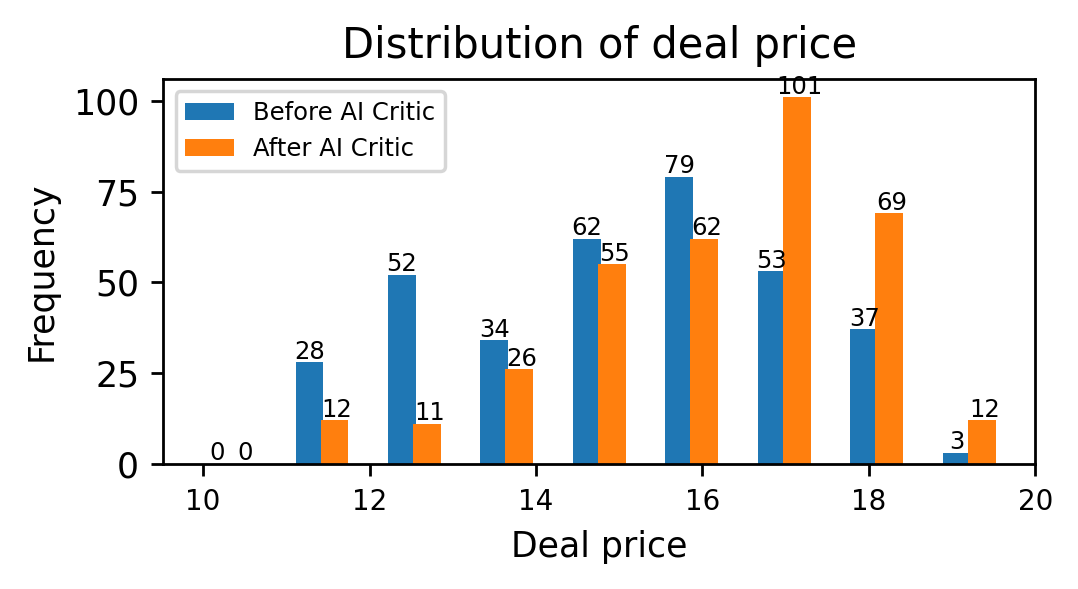

In [69]:
p1, p2 = read_price('../outputs/criticize_seller_500_runs_rollout_2_ver_0.2.1.0.txt')
draw(p1, p2, figsize=(4.5, 2))

## 0.2.0.0 Claude-instant-v1.0 criticize buyer

Total: 429
Round 1 mean: 15.442307692307692
Round 2 mean: 15.249184149184149


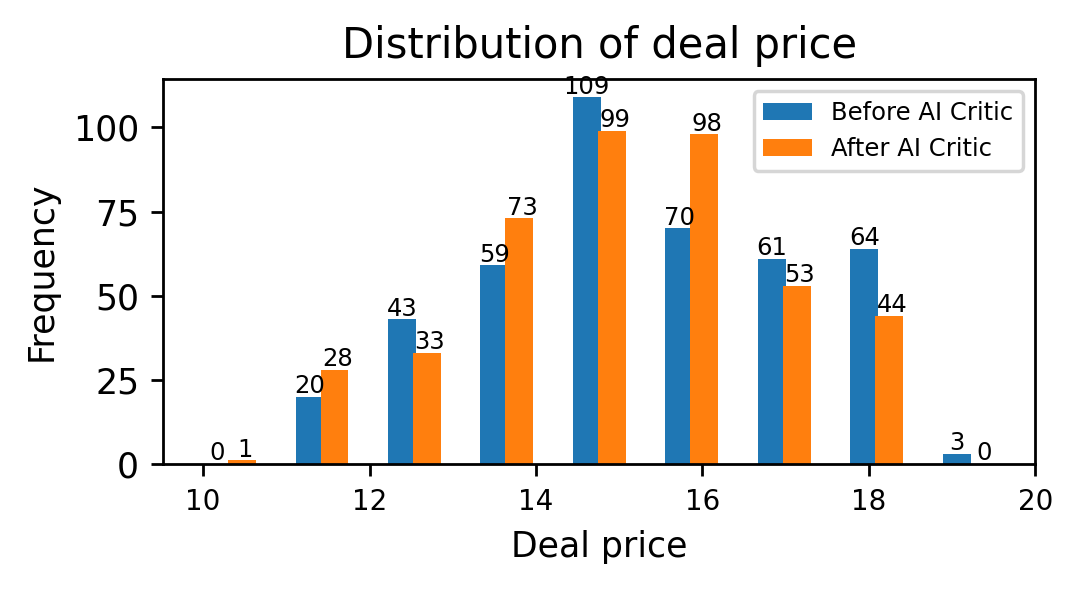

In [73]:
draw(*read_price('../outputs/criticize_buyer_500_runs_rollout_2_ver_0.2.0.0.txt'))

## 0.5.0 GPT-3.5-Turbo criticize seller

In [70]:
p1, p2 = read_price('../outputs/outputs_before_may/seller_critic_500_runs_0.5.0.txt')

Total: 354
Round 1 mean: 15.021186440677965
Round 2 mean: 16.706073446327686


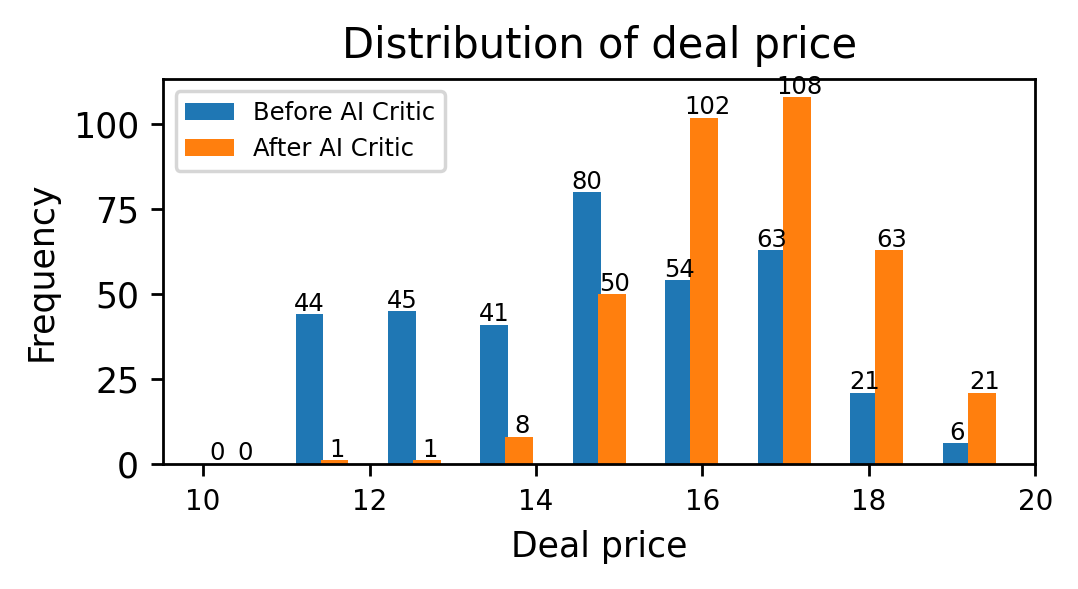

In [71]:
draw(p1, p2)

## 0.1.2 GPT-3.5-Turbo Criticize Buyer

Total: 399
Round 1 mean: 15.119047619047619
Round 2 mean: 14.570802005012531


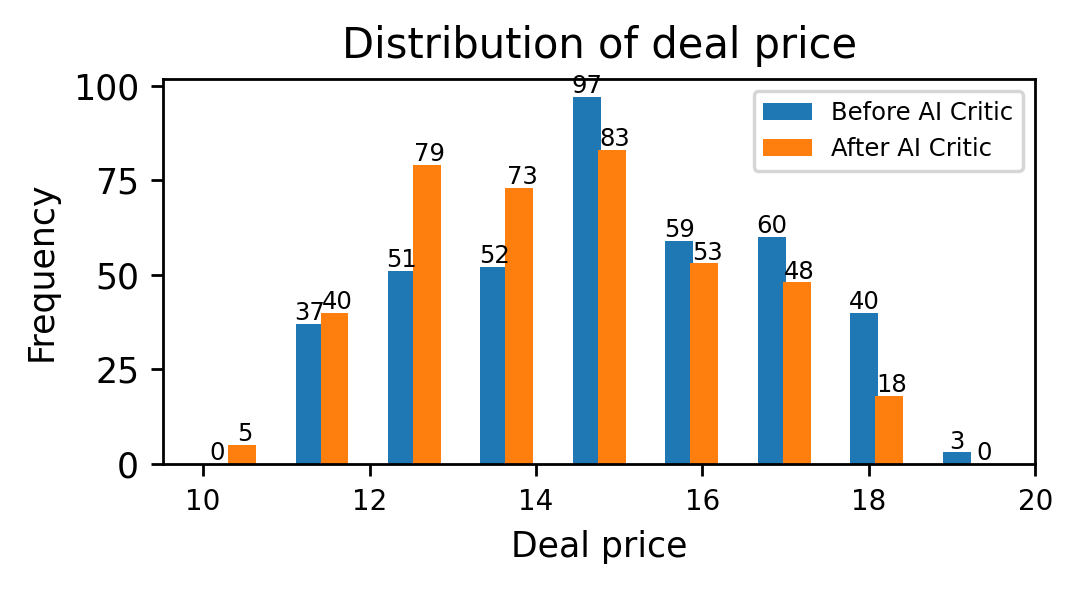

In [72]:
p1, p2 = read_price('../outputs/outputs_before_may/buyer_critic_500_runs_0.1.2.txt')
draw(p1, p2)

## 1.6.0 GPT-4 Criticize Buyer

In [98]:
prices = parse_outputs("outputs/buyer_critic_gpt_4_500_runs_rollout_2_ver_1.6.0.txt")

In [99]:
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]

In [100]:
len(filtered_price)

413

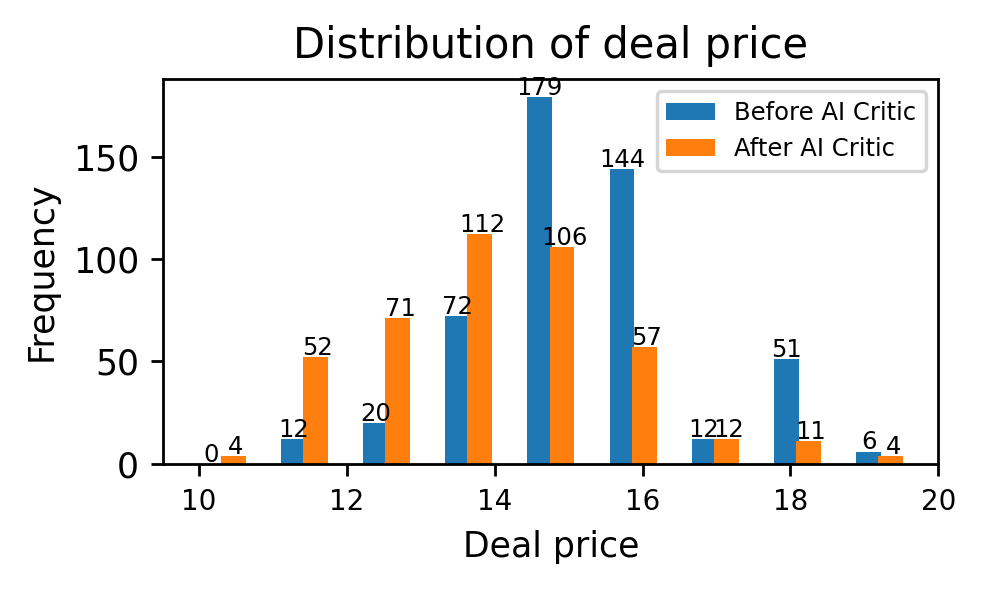

15.466 12.423399999999999


In [101]:
p0 = [p[0] for p in prices]
p1 = [p[1] for p in prices]
draw(p0, p1)
print(np.average(p0), np.average(p1))

## 1.5.0 GPT-4 Criticize Seller

In [61]:
prices = parse_outputs("../outputs/outputs_before_may/seller_critic_gpt_4_500_runs_rollout_2_ver_1.5.0.txt", price_per_case=2)

In [62]:
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]

In [63]:
len(filtered_price)

295

Total: 332
Round 1 mean: 15.739457831325302
Round 2 mean: 17.088825301204817


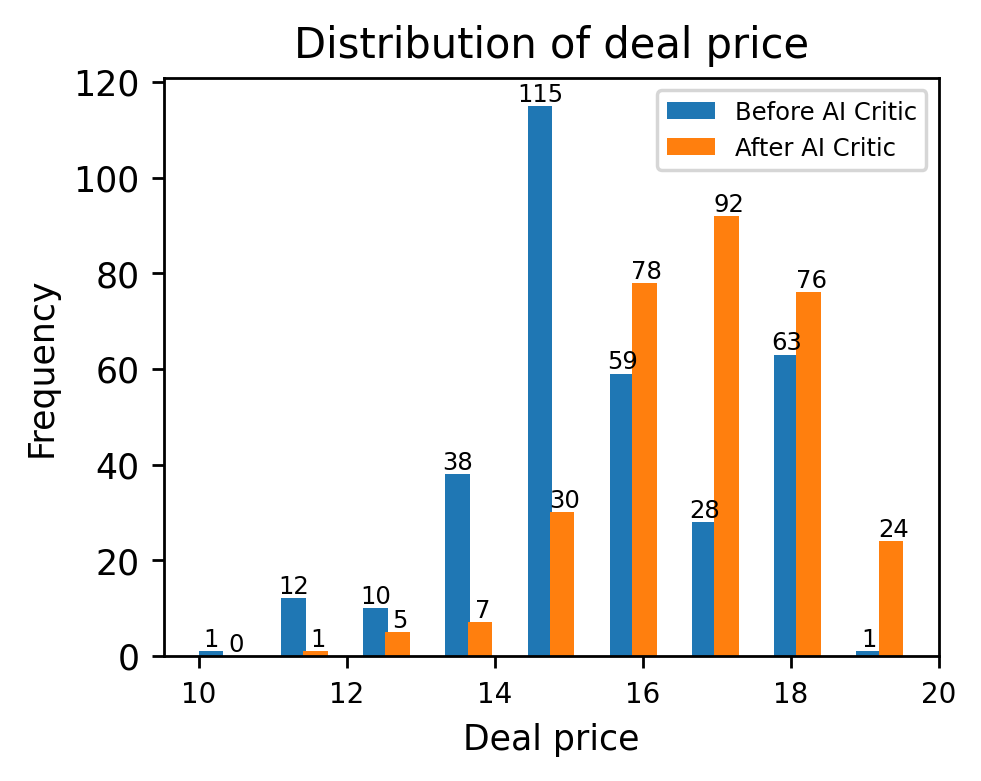

15.739457831325302
17.088825301204817


In [64]:
p0 = [p[0] for p in prices]
p1 = [p[1] for p in prices]
draw(p0, p1)
print(np.average(p0))
print(np.average(p1))

# AI Feedback v.s. human feedback

## GPT-3.5-Turbo Baseline. AI feedback better than human feedback

In [36]:
prices = parse_outputs("../outputs/outputs_before_may/seller_compare_feedback_500_runs_ver_1.9.0.txt", price_per_case=4)
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]

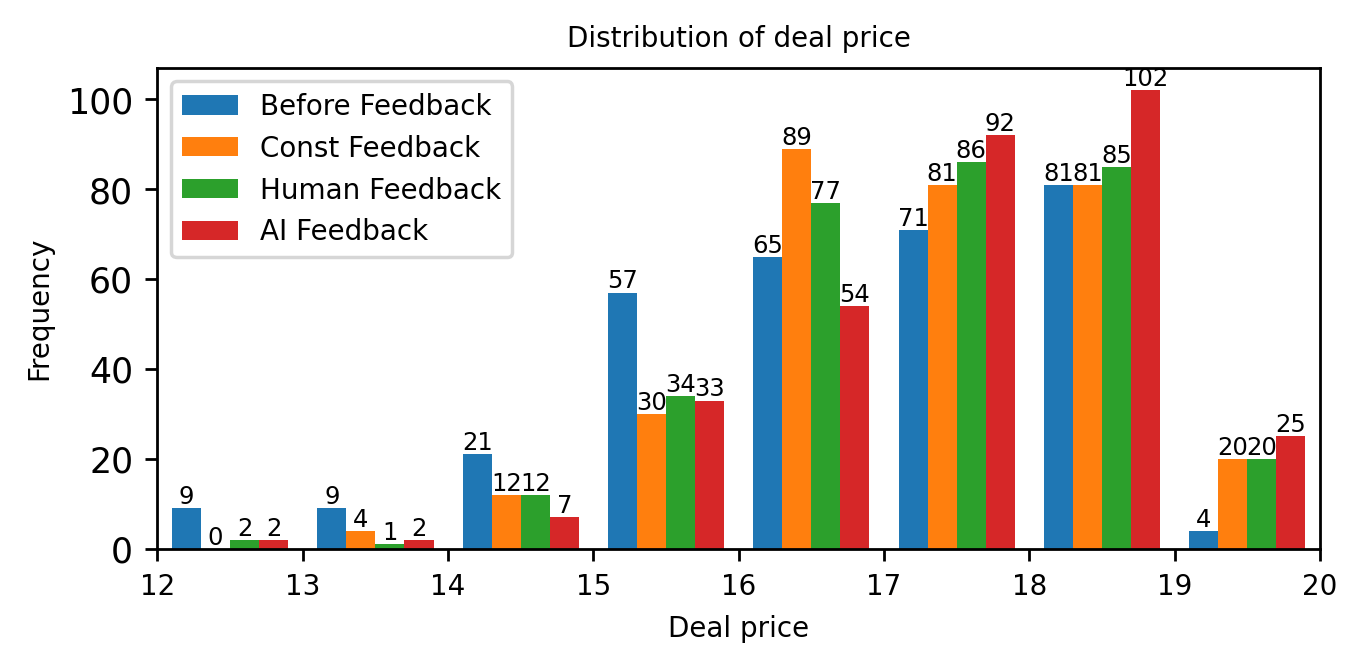

In [35]:
filtered_price_ = []
for p in filtered_price: filtered_price_.append([p[0], p[2], p[3], p[1]])
labels = ["Before Feedback", "Const Feedback", "Human Feedback", "AI Feedback"]
bins, hist = draw_multiple(filtered_price_, labels, figsize=[6,2.5], xlim=(12,20))

In [37]:
filtered_price_ = []
for p in filtered_price: filtered_price_.append([p[0],p[1]])
labels = ["Before Feedback","AI Feedback"]

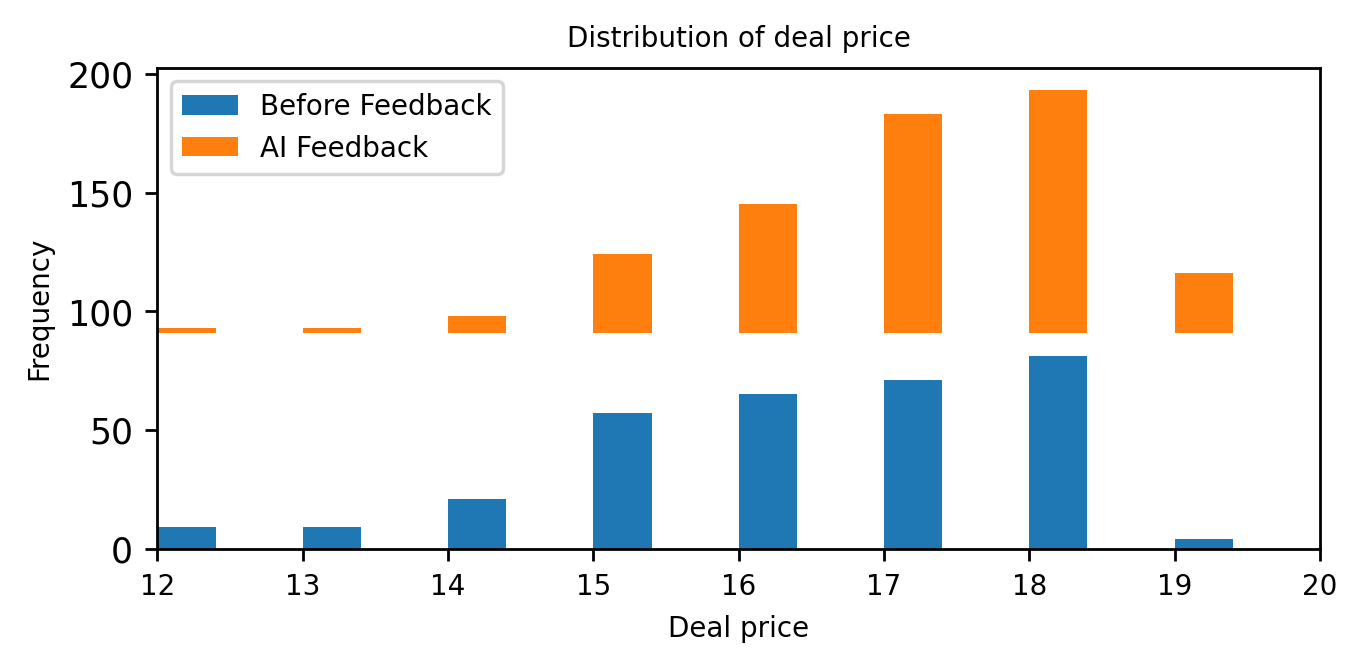

(array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]),
 [array([ 0,  0,  9,  9, 21, 57, 65, 71, 81,  4]),
  array([  0,   0,   2,   2,   7,  33,  54,  92, 102,  25])])

In [42]:
draw_multiple_with_bottom(filtered_price_, labels, figsize=[6,2.5], xlim=(12,20))

## AI21 Labs j2-jumbo-instruct. Weird distribution 

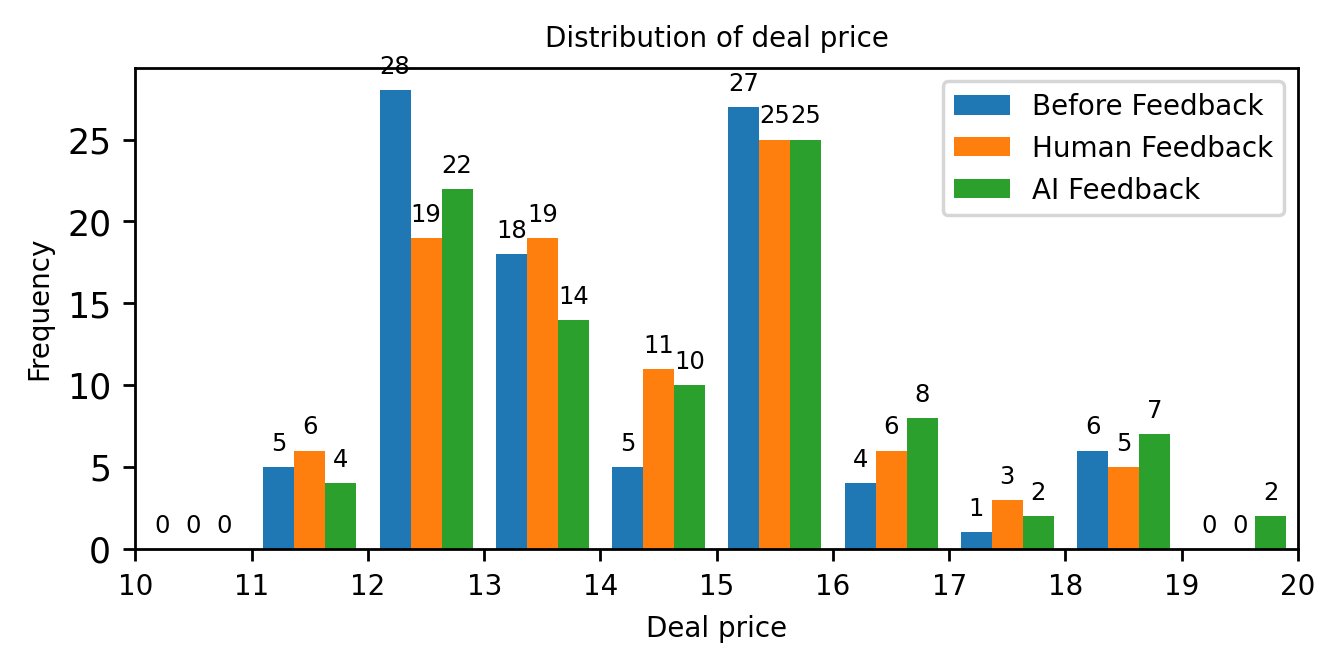

In [25]:
prices = parse_outputs("../outputs/seller_compare_feedback_200_runs_ver_1.11.0.txt", price_per_case=4)
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]
filtered_price_ = []
# for p in filtered_price: filtered_price_.append([p[0], p[2], p[3], p[1]])
# labels = ["Before Feedback", "Const Feedback", "Human Feedback", "AI Feedback"]
for p in filtered_price: filtered_price_.append([p[0], p[3], p[1]])
labels = ["Before Feedback", "Human Feedback", "AI Feedback"]
bins, hist = draw_multiple(filtered_price_, labels, figsize=[6,2.5], xlim=(10,20))

## Claude Instant v1.0

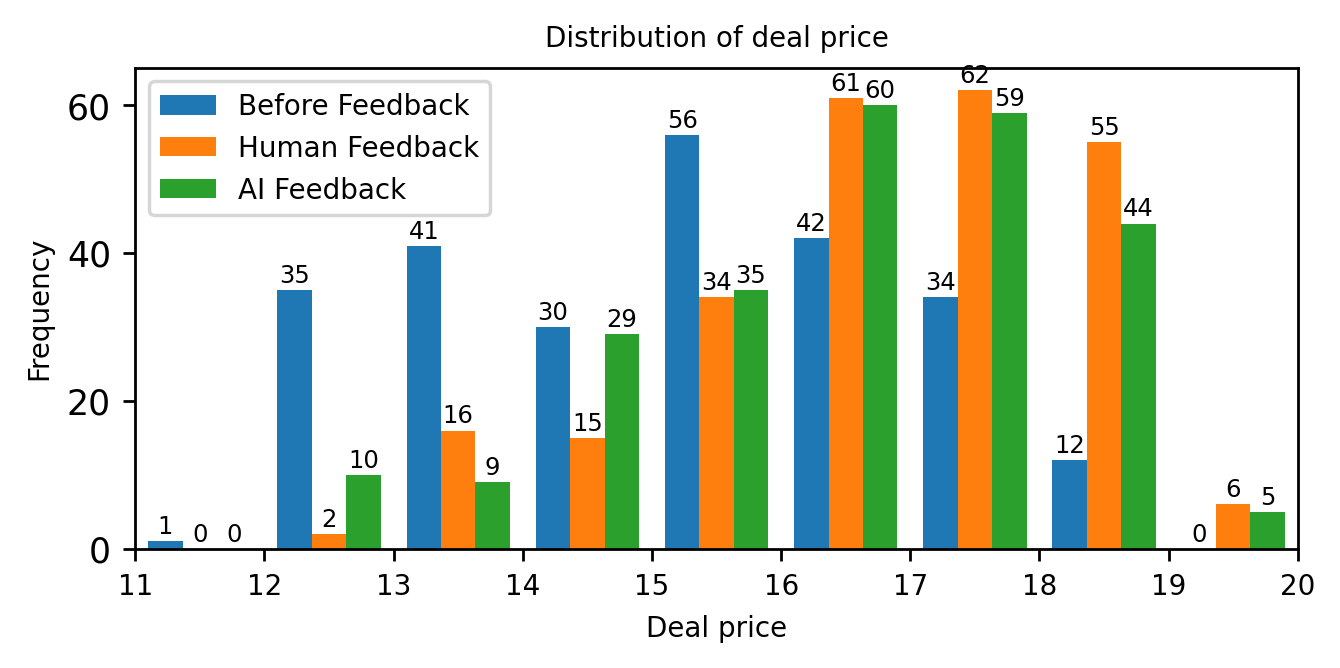

In [20]:
prices = parse_outputs("../outputs/seller_compare_feedback_500_runs_ver_1.10.0.txt", price_per_case=4)
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]
filtered_price_ = []
# for p in filtered_price: filtered_price_.append([p[0], p[2], p[3], p[1]])
# labels = ["Before Feedback", "Const Feedback", "Human Feedback", "AI Feedback"]
for p in filtered_price: filtered_price_.append([p[0], p[3], p[1]])
labels = ["Before Feedback", "Human Feedback", "AI Feedback"]
bins, hist = draw_multiple(filtered_price_, labels, figsize=[6,2.5], xlim=(11,20))